# Countries of the World EDA

## Abstract

-  The aim of this project is to do Exploratory Data Analysis(EDA) on the dataset of the countries of the world and find out which attributes can be the best predictors for GDP (per capita). EDA is a process of performing investigations on the data to find patterns, spot anomalies, test hypothesis and check assumptions by performing some statistics and checking graphical representations. EDA is simply about exploring the data and possibly formulate hypothesis.


-  After doing the EDA, one must be able to tell which are the best predictors to predict GDP (per capita) of a country. Apart from that, along with doing some EDA, the aim of this experiment is also to understand the python command used to do this analysis.


-  This project will help us come up with the best predictors for predicting the GDP in the future from the given list of predictors. One point is to be noted that, the analysis might give a results that might not be true in real life, therefore keeping in mind the real life factor along with the statistics, the predictors must be decided.


-  EDA is used to build basic models. More and more EDA is peformed and the model is reiterated.


### The Data

GDP ($ per capita) (Target - the dependent variable)


Possible independent variables (predictors)

Country                                    
Region                                     
Population                                  
Area (sq. mi.)                              
Pop. Density (per sq. mi.)                
Coastline (coast/area ratio)              
Net migration                             
Infant mortality (per 1000 births)        
Literacy (%)                              
Phones (per 1000)                         
Arable (%)                                
Crops (%)                                 
Other (%)                                 
Climate                                   
Birthrate                                 
Deathrate                                 
Agriculture                               
Industry                                  
Service  



### Acknowledgements

Source: All these data sets are made up of data from the US government. Data from the World Factbook is public domain. The website says "The World Factbook is in the public domain and may be used freely by anyone at anytime without seeking permission." 
[https://www.cia.gov/library/publications/the-world-factbook/docs/faqs.html](https://www.cia.gov/library/publications/the-world-factbook/docs/faqs.html)

### Importing all the required libraries

In [1]:
# importing libraries
%matplotlib inline 
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
from scipy import stats
import seaborn as sns
import re
from sklearn.preprocessing import LabelEncoder
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import mean_squared_error

/Users/pratiknarendrapawar/opt/anaconda3/lib/python3.7/site-packages/statsmodels/tools/_testing.py:19: FutureWarning: pandas.util.testing is deprecated. Use the functions in the public API at pandas.testing instead.
  import pandas.util.testing as tm


The read_csv function from the Pandas library is used to read the values into a dataframe from the Comma Separated Value (CSV) file.

In [2]:
# importing the dataset
df=pd.read_csv("countries of the world.csv", decimal = ',')

The first 5 values of the dataset are displayed.

In [3]:
df.head()

,Country,Region,Population,Area (sq. mi.),Pop. Density (per sq. mi.),Coastline (coast/area ratio),Net migration,Infant mortality (per 1000 births),GDP ($ per capita),Literacy (%),Phones (per 1000),Arable (%),Crops (%),Other (%),Climate,Birthrate,Deathrate,Agriculture,Industry,Service
0,Afghanistan,ASIA (EX. NEAR EAST),31056997,647500,48.0,0.00,23.06,163.07,700.0,36.0,3.2,12.13,0.22,87.65,1.0,46.60,20.34,0.380,0.240,0.380
1,Albania,EASTERN EUROPE,3581655,28748,124.6,1.26,-4.93,21.52,4500.0,86.5,71.2,21.09,4.42,74.49,3.0,15.11,5.22,0.232,0.188,0.579
2,Algeria,NORTHERN AFRICA,32930091,2381740,13.8,0.04,-0.39,31.00,6000.0,70.0,78.1,3.22,0.25,96.53,1.0,17.14,4.61,0.101,0.600,0.298
3,American Samoa,OCEANIA,57794,199,290.4,58.29,-20.71,9.27,8000.0,97.0,259.5,10.00,15.00,75.00,2.0,22.46,3.27,NaN,NaN,NaN
4,Andorra,WESTERN EUROPE,71201,468,152.1,0.00,6.60,4.05,19000.0,100.0,497.2,2.22,0.00,97.78,3.0,8.71,6.25,NaN,NaN,NaN


* The count, mean, standard deviation, minimum, lower percentile (25%), median (50%), upper percentile (75%) of the numeric data is generated


* If the data is in the form of an object (ex: String) then the result generated will include count, unique, top and frequency.

In [4]:
df.describe()

,Population,Area (sq. mi.),Pop. Density (per sq. mi.),Coastline (coast/area ratio),Net migration,Infant mortality (per 1000 births),GDP ($ per capita),Literacy (%),Phones (per 1000),Arable (%),Crops (%),Other (%),Climate,Birthrate,Deathrate,Agriculture,Industry,Service
count,2.270000e+02,2.270000e+02,227.000000,227.000000,224.000000,224.000000,226.000000,209.000000,223.000000,225.000000,225.000000,225.000000,205.000000,224.000000,223.000000,212.000000,211.000000,212.000000
mean,2.874028e+07,5.982270e+05,379.047137,21.165330,0.038125,35.506964,9689.823009,82.838278,236.061435,13.797111,4.564222,81.638311,2.139024,22.114732,9.241345,0.150844,0.282711,0.565283
std,1.178913e+08,1.790282e+06,1660.185825,72.286863,4.889269,35.389899,10049.138513,19.722173,227.991829,13.040402,8.361470,16.140835,0.699397,11.176716,4.990026,0.146798,0.138272,0.165841
min,7.026000e+03,2.000000e+00,0.000000,0.000000,-20.990000,2.290000,500.000000,17.600000,0.200000,0.000000,0.000000,33.330000,1.000000,7.290000,2.290000,0.000000,0.020000,0.062000
25%,4.376240e+05,4.647500e+03,29.150000,0.100000,-0.927500,8.150000,1900.000000,70.600000,37.800000,3.220000,0.190000,71.650000,2.000000,12.672500,5.910000,0.037750,0.193000,0.429250
50%,4.786994e+06,8.660000e+04,78.800000,0.730000,0.000000,21.000000,5550.000000,92.500000,176.200000,10.420000,1.030000,85.700000,2.000000,18.790000,7.840000,0.099000,0.272000,0.571000
75%,1.749777e+07,4.418110e+05,190.150000,10.345000,0.997500,55.705000,15700.000000,98.000000,389.650000,20.000000,4.440000,95.440000,3.000000,29.820000,10.605000,0.221000,0.341000,0.678500
max,1.313974e+09,1.707520e+07,16271.500000,870.660000,23.060000,191.190000,55100.000000,100.000000,1035.600000,62.110000,50.680000,100.000000,4.000000,50.730000,29.740000,0.769000,0.906000,0.954000


In [5]:
print(df.shape)

(227, 20)


In [6]:
df = df.drop_duplicates(keep='first')
print(df.shape) 

(227, 20)


### Sort countries by GDP per capita

Sorting the values of the column 'GDP ($ per capita)' in a descending order and displaying the first 20 values of the same.

In [7]:
top_gdp_countries = df.sort_values('GDP ($ per capita)',ascending=False)
# Look at top 20
top_gdp_countries[['GDP ($ per capita)','Country']].head(20)

,GDP ($ per capita),Country
121,55100.0,Luxembourg
154,37800.0,Norway
214,37800.0,United States
22,36000.0,Bermuda
38,35000.0,Cayman Islands
177,34600.0,San Marino
196,32700.0,Switzerland
54,31100.0,Denmark
93,30900.0,Iceland
12,30000.0,Austria


Plotting a Barplot for GDP(per capita) vs Country for the first 33 values using the barplot function imported from the Seaborn library.

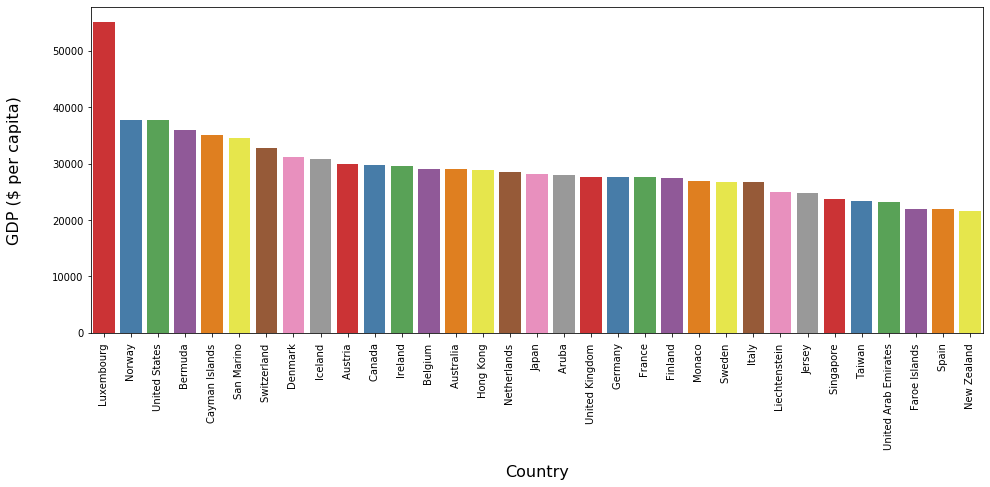

In [8]:
fig, ax = plt.subplots(figsize=(16,6))
sns.barplot(x='Country', y='GDP ($ per capita)', data=top_gdp_countries.head(33), palette='Set1')
ax.set_xlabel(ax.get_xlabel(), labelpad=15)
ax.set_ylabel(ax.get_ylabel(), labelpad=30)
ax.xaxis.label.set_fontsize(16)
ax.yaxis.label.set_fontsize(16)
plt.xticks(rotation=90)
plt.show()

Plotting a barplot for GDP (per capita) vs Country for the bottom 33 values using the barplot function from the Seaborn Library.

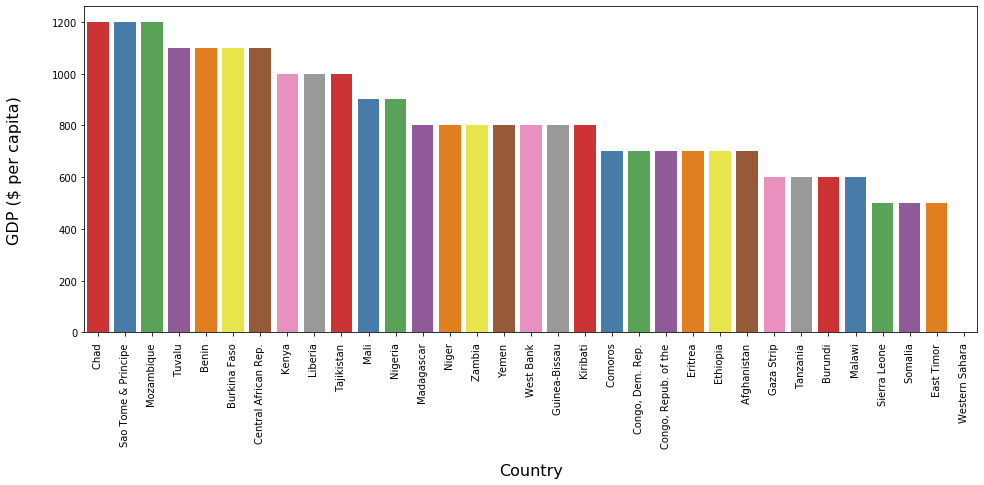

In [9]:
fig, ax = plt.subplots(figsize=(16,6))
sns.barplot(x='Country', y='GDP ($ per capita)', data=top_gdp_countries.tail(33), palette='Set1')
ax.set_xlabel(ax.get_xlabel(), labelpad=15)
ax.set_ylabel(ax.get_ylabel(), labelpad=30)
ax.xaxis.label.set_fontsize(16)
ax.yaxis.label.set_fontsize(16)
plt.xticks(rotation=90)
plt.show()

-  df.isnull() : returns True where a null value exists


-  df.isnull().sum() != 0 : calculates the sum of all null values and returns True where null values are present


-  df.isnull().sum()[df.isnull().sum() != 0].sort_values(ascending = False) : returns the number of null values present where the values returned by the above expression is True and arrange those values in Descending order.


-  pd.Series(round(total/len(df)x100,2)) : percentage of the total null values is found for the particular predictor value


-  The total missing values and the percentage values are concatenated.

In [10]:
total = df.isnull().sum()[df.isnull().sum() != 0].sort_values(ascending = False)
percent = pd.Series(round(total/len(df)*100,2))
pd.concat([total, percent], axis=1, keys=['total_missing', 'percent'])

,total_missing,percent
Climate,22,9.69
Literacy (%),18,7.93
Industry,16,7.05
Service,15,6.61
Agriculture,15,6.61
Deathrate,4,1.76
Phones (per 1000),4,1.76
Birthrate,3,1.32
Infant mortality (per 1000 births),3,1.32
Net migration,3,1.32


Checking if null values exist in the data

In [11]:
# Checking for null values
df.isnull().values.any() 

True

Calculating the total number of null values

In [12]:
df.isnull().sum().sum()

110

## Regions

All the regions are grouped and the median values of their GDP (per capita), Literacy and Agriculture are displayed

In [13]:
df.groupby('Region')[['GDP ($ per capita)', 'Literacy (%)', 'Agriculture']].median()

,GDP ($ per capita),Literacy (%),Agriculture
Region,,,
ASIA (EX. NEAR EAST),3450.0,90.60,0.1610
BALTICS,11400.0,99.80,0.0400
C.W. OF IND. STATES,3450.0,99.05,0.1980
EASTERN EUROPE,9100.0,98.60,0.0815
LATIN AMER. & CARIB,6300.0,94.05,0.0700
NEAR EAST,9250.0,83.00,0.0350
NORTHERN AFRICA,6000.0,70.00,0.1320
NORTHERN AMERICA,29800.0,97.50,0.0100
OCEANIA,5000.0,95.00,0.1505


Seeding random number generator.

In [14]:
np.random.seed(sum(map(ord, "distributions")))

The first 5 values are displayed

In [15]:
df.head()

,Country,Region,Population,Area (sq. mi.),Pop. Density (per sq. mi.),Coastline (coast/area ratio),Net migration,Infant mortality (per 1000 births),GDP ($ per capita),Literacy (%),Phones (per 1000),Arable (%),Crops (%),Other (%),Climate,Birthrate,Deathrate,Agriculture,Industry,Service
0,Afghanistan,ASIA (EX. NEAR EAST),31056997,647500,48.0,0.00,23.06,163.07,700.0,36.0,3.2,12.13,0.22,87.65,1.0,46.60,20.34,0.380,0.240,0.380
1,Albania,EASTERN EUROPE,3581655,28748,124.6,1.26,-4.93,21.52,4500.0,86.5,71.2,21.09,4.42,74.49,3.0,15.11,5.22,0.232,0.188,0.579
2,Algeria,NORTHERN AFRICA,32930091,2381740,13.8,0.04,-0.39,31.00,6000.0,70.0,78.1,3.22,0.25,96.53,1.0,17.14,4.61,0.101,0.600,0.298
3,American Samoa,OCEANIA,57794,199,290.4,58.29,-20.71,9.27,8000.0,97.0,259.5,10.00,15.00,75.00,2.0,22.46,3.27,NaN,NaN,NaN
4,Andorra,WESTERN EUROPE,71201,468,152.1,0.00,6.60,4.05,19000.0,100.0,497.2,2.22,0.00,97.78,3.0,8.71,6.25,NaN,NaN,NaN


## Box Plot

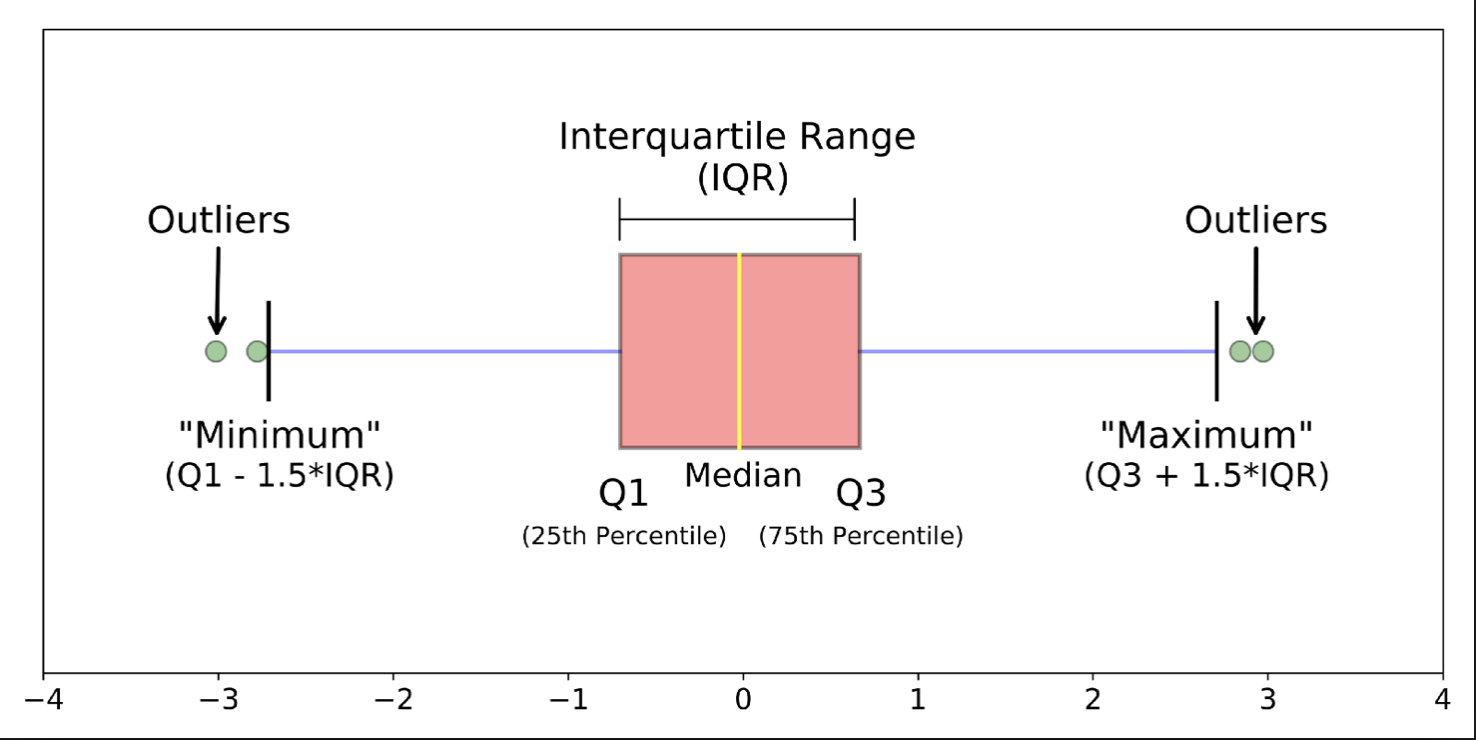

* A box plot divides the data into five divisions namely the minimum value, first quartile, median, third quartile and the maximum value.


* A box plot can tell us what the outliers (extreme values) are and can also help us identify if our data is symmetrical and how tightly grouped it is and how much skewed the data is.


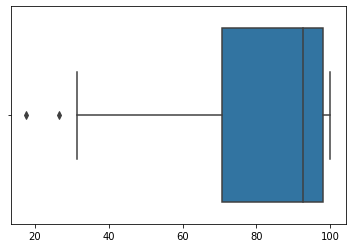

In [16]:
sns.boxplot(np.array(df['Literacy (%)']))

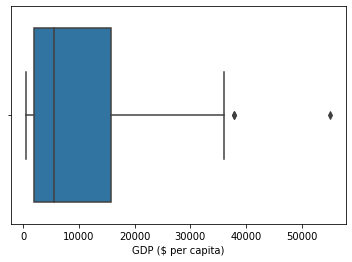

In [17]:
sns.boxplot(df['GDP ($ per capita)'])

Correlation between every entity is found. Correlation values range from -1 to +1. Larger the absolute value, stronger the correlation. Negative values indicate inverse correlation.

In [18]:
df.corr()

,Population,Area (sq. mi.),Pop. Density (per sq. mi.),Coastline (coast/area ratio),Net migration,Infant mortality (per 1000 births),GDP ($ per capita),Literacy (%),Phones (per 1000),Arable (%),Crops (%),Other (%),Climate,Birthrate,Deathrate,Agriculture,Industry,Service
Population,1.000000,0.469985,-0.028190,-0.068199,0.000011,0.023003,-0.039324,-0.043481,-0.030819,0.188251,-0.060757,-0.120606,-0.026546,-0.045090,-0.028367,0.000376,0.099333,-0.080852
Area (sq. mi.),0.469985,1.000000,-0.066917,-0.095627,0.047470,-0.007163,0.072185,0.035994,0.053403,-0.079714,-0.143916,0.138974,-0.117134,-0.066423,0.040079,-0.050640,0.121565,-0.054369
Pop. Density (per sq. mi.),-0.028190,-0.066917,1.000000,0.241690,0.178038,-0.144238,0.195773,0.097230,0.280172,-0.081015,-0.031661,0.081859,0.009064,-0.159192,-0.070045,-0.107142,-0.139803,0.248774
Coastline (coast/area ratio),-0.068199,-0.095627,0.241690,1.000000,-0.134145,-0.136577,0.049118,0.117095,0.152129,-0.120772,0.341820,-0.079494,-0.032579,-0.075765,-0.161866,-0.030250,-0.199995,0.196528
Net migration,0.000011,0.047470,0.178038,-0.134145,1.000000,-0.025015,0.382461,-0.008761,0.239601,-0.058170,-0.347968,0.225299,-0.015170,-0.066537,0.033611,-0.116719,-0.026324,0.127134
Infant mortality (per 1000 births),0.023003,-0.007163,-0.144238,-0.136577,-0.025015,1.000000,-0.600774,-0.765536,-0.672312,-0.113859,-0.062366,0.124100,-0.374406,0.845764,0.656338,0.709475,0.003322,-0.633982
GDP ($ per capita),-0.039324,0.072185,0.195773,0.049118,0.382461,-0.600774,1.000000,0.513144,0.834499,0.019768,-0.219229,0.097828,0.340791,-0.650137,-0.201661,-0.586769,-0.028926,0.550216
Literacy (%),-0.043481,0.035994,0.097230,0.117095,-0.008761,-0.765536,0.513144,1.000000,0.601935,0.105021,0.042825,-0.107563,0.392081,-0.790846,-0.393946,-0.609638,0.064733,0.494607
Phones (per 1000),-0.030819,0.053403,0.280172,0.152129,0.239601,-0.672312,0.834499,0.601935,1.000000,0.061022,-0.152420,0.029900,0.402161,-0.724614,-0.260309,-0.601739,-0.152452,0.683934
Arable (%),0.188251,-0.079714,-0.081015,-0.120772,-0.058170,-0.113859,0.019768,0.105021,0.061022,1.000000,0.094361,-0.856763,0.380031,-0.186823,0.053472,-0.034822,-0.063618,0.091126


A heatmap is a numeric tabular data where the cells are colored depending on the values of the correlation. Higher the magnitude of correlation, darker the colour.

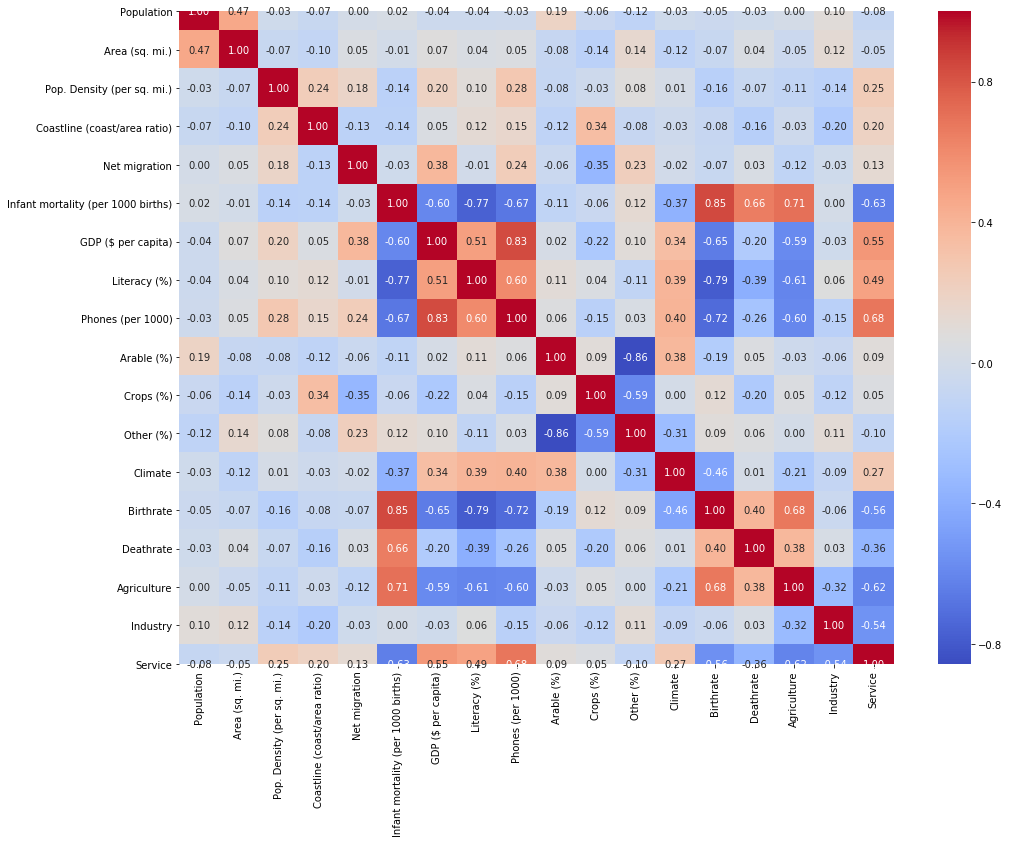

In [19]:
plt.figure(figsize=(16,12))
sns.heatmap(data=df.iloc[:,2:].corr(),annot=True,fmt='.2f',cmap='coolwarm')
plt.show()

In [20]:
df.columns.values[2:]

array(['Population', 'Area (sq. mi.)', 'Pop. Density (per sq. mi.)',
       'Coastline (coast/area ratio)', 'Net migration',
       'Infant mortality (per 1000 births)', 'GDP ($ per capita)',
       'Literacy (%)', 'Phones (per 1000)', 'Arable (%)', 'Crops (%)',
       'Other (%)', 'Climate', 'Birthrate', 'Deathrate', 'Agriculture',
       'Industry', 'Service'], dtype=object)

* Infant mortality rate(per 1000 births), Literacy, Phones, Birthrate, Agriculture, and Service have the highest absolute correlation with GDP (per capita).


* These attributes are chosen to display the heatmap in order to get the correlation of the same.

In [21]:
# choose attributes which shows relation
x = df[['GDP ($ per capita)','Literacy (%)','Phones (per 1000)','Service','Infant mortality (per 1000 births)','Birthrate','Deathrate','Agriculture']]

The predictor 'Agriculture' was missing from the heatmap. Agriculture also has a good correlation with GDP. Therefore, it is added to observe the heatmap.

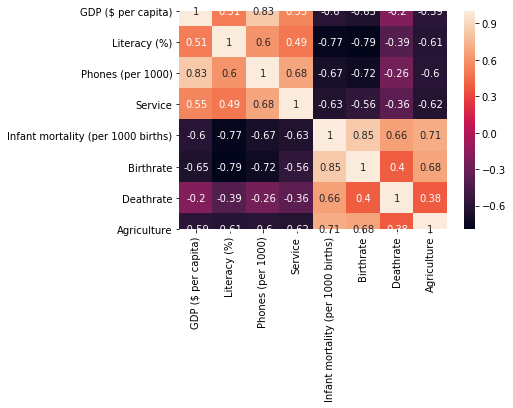

In [22]:
# show corr of the same
sns.heatmap(x.corr(), annot=True)

From the heatmap it is observed that GDP(per capita) has the highest correlation with Phones(per 1000) of 0.83.

In [23]:
 df.columns.values[2:]

array(['Population', 'Area (sq. mi.)', 'Pop. Density (per sq. mi.)',
       'Coastline (coast/area ratio)', 'Net migration',
       'Infant mortality (per 1000 births)', 'GDP ($ per capita)',
       'Literacy (%)', 'Phones (per 1000)', 'Arable (%)', 'Crops (%)',
       'Other (%)', 'Climate', 'Birthrate', 'Deathrate', 'Agriculture',
       'Industry', 'Service'], dtype=object)

/Users/pratiknarendrapawar/opt/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:4: DeprecationWarning: The default dtype for empty Series will be 'object' instead of 'float64' in a future version. Specify a dtype explicitly to silence this warning.
  after removing the cwd from sys.path.


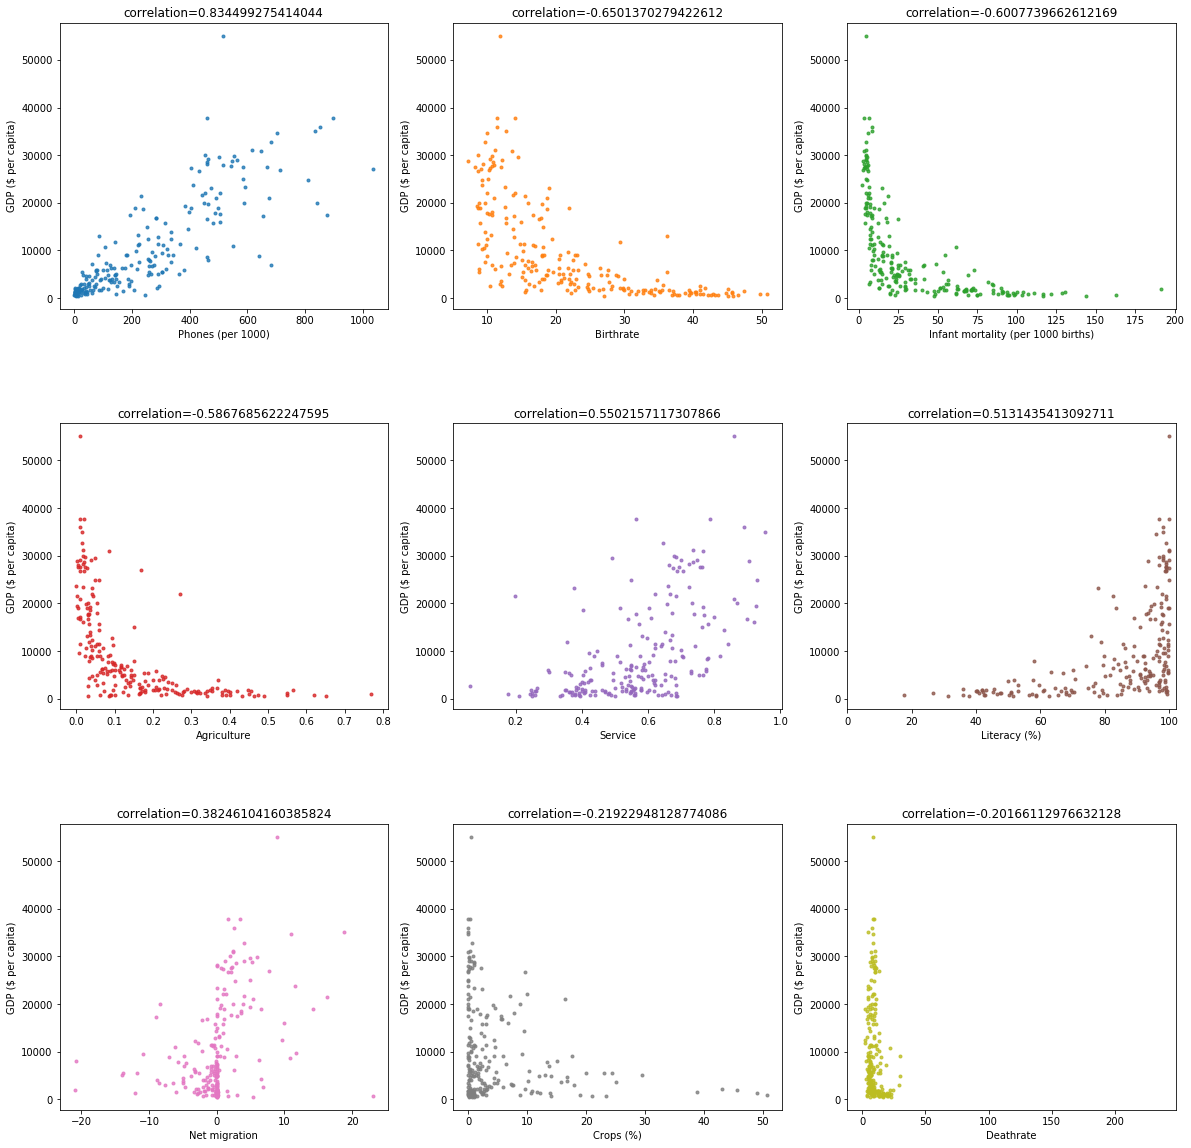

In [27]:
fig, axes = plt.subplots(nrows=3, ncols=3, figsize=(20,20))
plt.subplots_adjust(hspace=0.4)

corr_to_gdp = pd.Series()
for col in df.columns.values[2:]:
    if ((col!='GDP ($ per capita)')&(col!='Climate')):
        corr_to_gdp[col] = df['GDP ($ per capita)'].corr(df[col])
abs_corr_to_gdp = corr_to_gdp.abs().sort_values(ascending=False)
corr_to_gdp = corr_to_gdp.loc[abs_corr_to_gdp.index]

for i in range(3):
    for j in range(3):
        sns.regplot(x=corr_to_gdp.index.values[i*3+j], y='GDP ($ per capita)', data=df,
                   ax=axes[i,j], fit_reg=False, marker='.')
        title = 'correlation='+str(corr_to_gdp[i*3+j])
        axes[i,j].set_title(title)
axes[1,2].set_xlim(0,102)
plt.show()

In the above linear regression, we are plotting the top 9 values that have a good correlation with GDP ($ per capita). From this model, we can further infer that Phones (per 1000) and Service have a better linear regression to GDP than other predictors.

The absolute correlation values of the possible predictors for GDP ($ per capita) arranged in Descending order.

In [28]:
corr_to_gdp.abs().sort_values(ascending=False)

Phones (per 1000)                     0.834499
Birthrate                             0.650137
Infant mortality (per 1000 births)    0.600774
Agriculture                           0.586769
Service                               0.550216
Literacy (%)                          0.513144
Net migration                         0.382461
Crops (%)                             0.219229
Deathrate                             0.201661
Pop. Density (per sq. mi.)            0.195773
Other (%)                             0.097828
Area (sq. mi.)                        0.072185
Coastline (coast/area ratio)          0.049118
Population                            0.039324
Industry                              0.028926
Arable (%)                            0.019768
dtype: float64

In [29]:
abs_corr_to_gdp

Phones (per 1000)                     0.834499
Birthrate                             0.650137
Infant mortality (per 1000 births)    0.600774
Agriculture                           0.586769
Service                               0.550216
Literacy (%)                          0.513144
Net migration                         0.382461
Crops (%)                             0.219229
Deathrate                             0.201661
Pop. Density (per sq. mi.)            0.195773
Other (%)                             0.097828
Area (sq. mi.)                        0.072185
Coastline (coast/area ratio)          0.049118
Population                            0.039324
Industry                              0.028926
Arable (%)                            0.019768
dtype: float64

In [30]:
corr_to_gdp

Phones (per 1000)                     0.834499
Birthrate                            -0.650137
Infant mortality (per 1000 births)   -0.600774
Agriculture                          -0.586769
Service                               0.550216
Literacy (%)                          0.513144
Net migration                         0.382461
Crops (%)                            -0.219229
Deathrate                            -0.201661
Pop. Density (per sq. mi.)            0.195773
Other (%)                             0.097828
Area (sq. mi.)                        0.072185
Coastline (coast/area ratio)          0.049118
Population                           -0.039324
Industry                             -0.028926
Arable (%)                            0.019768
dtype: float64

It can be inferred from the given regplot that Phones and Service have the best linear regression plot with GDP.

We choose the attributes GDP, Phones and Service and find the median value of them for every Region since we are doing the analysis for Region here

In [31]:
df.groupby('Region')[['GDP ($ per capita)', 'Phones (per 1000)', 'Service']].median()

,GDP ($ per capita),Phones (per 1000),Service
Region,,,
ASIA (EX. NEAR EAST),3450.0,61.50,0.4950
BALTICS,11400.0,321.40,0.6660
C.W. OF IND. STATES,3450.0,155.35,0.4595
EASTERN EUROPE,9100.0,296.05,0.5910
LATIN AMER. & CARIB,6300.0,222.85,0.6180
NEAR EAST,9250.0,211.00,0.5840
NORTHERN AFRICA,6000.0,123.60,0.4255
NORTHERN AMERICA,29800.0,683.20,0.7870
OCEANIA,5000.0,118.60,0.6440


In [32]:
# choose attributes which shows relation
x = df[['Region','GDP ($ per capita)','Phones (per 1000)','Service']]
x

,Region,GDP ($ per capita),Phones (per 1000),Service
0,ASIA (EX. NEAR EAST),700.0,3.2,0.380
1,EASTERN EUROPE,4500.0,71.2,0.579
2,NORTHERN AFRICA,6000.0,78.1,0.298
3,OCEANIA,8000.0,259.5,NaN
4,WESTERN EUROPE,19000.0,497.2,NaN
...,...,...,...,...
222,NEAR EAST,800.0,145.2,0.630
223,NORTHERN AFRICA,NaN,NaN,0.400
224,NEAR EAST,800.0,37.2,0.393
225,SUB-SAHARAN AFRICA,800.0,8.2,0.489


/Users/pratiknarendrapawar/opt/anaconda3/lib/python3.7/site-packages/numpy/lib/histograms.py:829: RuntimeWarning: invalid value encountered in greater_equal
  keep = (tmp_a >= first_edge)
/Users/pratiknarendrapawar/opt/anaconda3/lib/python3.7/site-packages/numpy/lib/histograms.py:830: RuntimeWarning: invalid value encountered in less_equal
  keep &= (tmp_a <= last_edge)


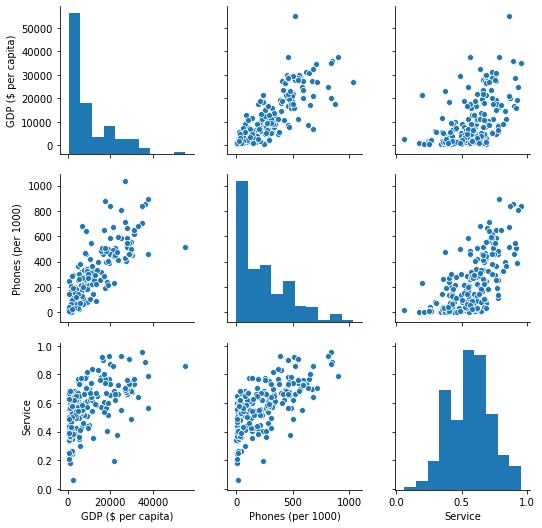

In [33]:
sns.pairplot(x,vars=["GDP ($ per capita)","Phones (per 1000)","Service"])

We can infer that GDP and Phone (per 1000), and GDP and Service are highly correlated.

The pairplot for Phones (per 1000) and Service is plotted with respect to GDP ($ per capita) for different Regions.

/Users/pratiknarendrapawar/opt/anaconda3/lib/python3.7/site-packages/statsmodels/nonparametric/kde.py:447: RuntimeWarning: invalid value encountered in greater
  X = X[np.logical_and(X > clip[0], X < clip[1])] # won't work for two columns.
/Users/pratiknarendrapawar/opt/anaconda3/lib/python3.7/site-packages/statsmodels/nonparametric/kde.py:447: RuntimeWarning: invalid value encountered in less
  X = X[np.logical_and(X > clip[0], X < clip[1])] # won't work for two columns.


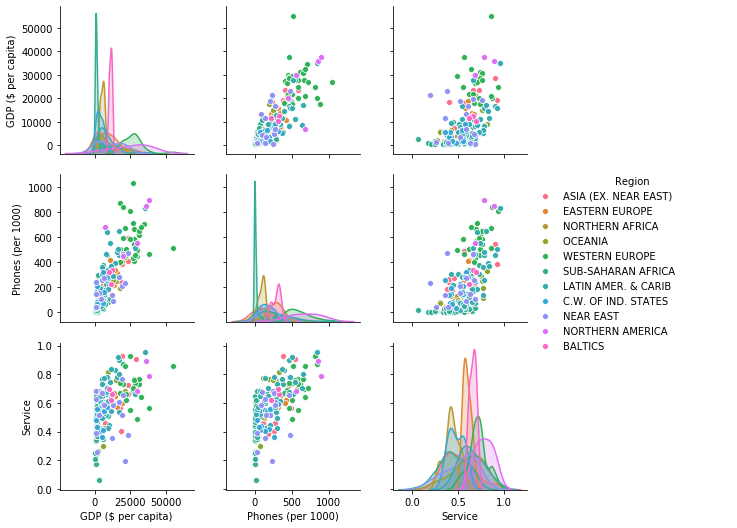

In [34]:
sns.pairplot(x,hue='Region',vars=["GDP ($ per capita)","Phones (per 1000)","Service"])

In [35]:
x.corr()

,GDP ($ per capita),Phones (per 1000),Service
GDP ($ per capita),1.000000,0.834499,0.550216
Phones (per 1000),0.834499,1.000000,0.683934
Service,0.550216,0.683934,1.000000


Phones (per 1000) has the highest correlation with GDP ($ per capita). Therefore, we can use Phones (per 1000) as a predictor value for GDP ($ per capita).

In [36]:
df['GDP ($ per capita)']

0        700.0
1       4500.0
2       6000.0
3       8000.0
4      19000.0
        ...   
222      800.0
223        NaN
224      800.0
225      800.0
226     1900.0
Name: GDP ($ per capita), Length: 227, dtype: float64

## Getting rid of the NaNs

In order to plot a distplot we need to get rid of the NaN values in the GDP (per capita) column.

We can get rid of the NaN values using various methods, some of them being:

    1. Deleting the rows where NaN values are present
    2. Replacing the NaN values by the mean value of that column
    3. Using the imputer function present in the sklearn library

Here, we get rid of the NaNs present in the GDP by deleting the rows which contain those values. 
We can see in the output obtained above by comparing the GDP (per capita) value and the gdp_no_nan value that the NaN values are removed by deleting the row. The length of the Series is reduced by 1 i.e from 227 to 226 as GDP had only one NaN value present.

In [37]:
gdp_no_nan= df['GDP ($ per capita)'][~np.isnan(df['GDP ($ per capita)'])]

In [38]:
gdp_no_nan

0        700.0
1       4500.0
2       6000.0
3       8000.0
4      19000.0
        ...   
221     3700.0
222      800.0
224      800.0
225      800.0
226     1900.0
Name: GDP ($ per capita), Length: 226, dtype: float64

## Distplot

-  It is a combination of a histogram and a seaborn kde plot. It is used for seeing the univariate distribution.


-  The distribution shown for gdp with itself in the seaborn pairplot contained NaN values. 


-  The distplot is similarly plotted for Phones (per 1000) and Service.

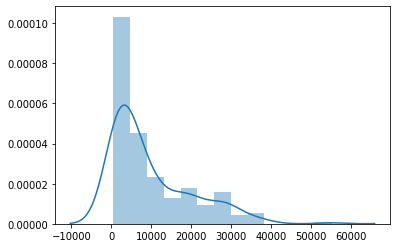

In [39]:
#checking distribution of literacy of the world
sns.distplot(np.array(gdp_no_nan))

-  Sometimes, deleting rows in order to get rid of the NaNs might cause some problems. 


-  We can resort to methods such as replacing the NaN values by zero or by the mean or the median values. Below analysis for Phones (per 1000) is done for replacing the NaN values by zero.

In [40]:
df['Phones (per 1000)']

0        3.2
1       71.2
2       78.1
3      259.5
4      497.2
       ...  
222    145.2
223      NaN
224     37.2
225      8.2
226     26.8
Name: Phones (per 1000), Length: 227, dtype: float64

In [41]:
y = df['Phones (per 1000)'].isnull().sum()

In [42]:
phones_no_nan= df['Phones (per 1000)'].replace(np.NaN, 0)

In [43]:
phones_no_nan

0        3.2
1       71.2
2       78.1
3      259.5
4      497.2
       ...  
222    145.2
223      0.0
224     37.2
225      8.2
226     26.8
Name: Phones (per 1000), Length: 227, dtype: float64

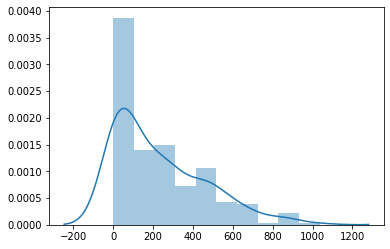

In [44]:
#checking distribution of literacy of the world
sns.distplot(np.array(phones_no_nan))

This graph is right skewed. 

This analysis done by replacing the NaN by mean values.

In [45]:
service_no_nan= df['Service'].replace(np.NaN, np.mean(df['Service']))
service_no_nan

0      0.380000
1      0.579000
2      0.298000
3      0.565283
4      0.565283
         ...   
222    0.630000
223    0.400000
224    0.393000
225    0.489000
226    0.579000
Name: Service, Length: 227, dtype: float64

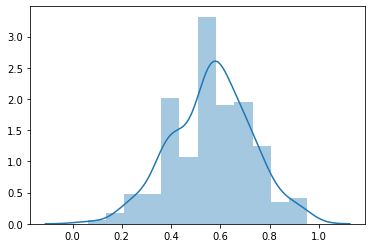

In [46]:
sns.distplot(np.array(service_no_nan))

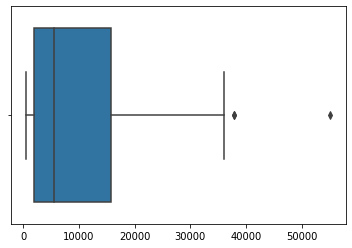

In [47]:
sns.boxplot(np.array(df['GDP ($ per capita)']))

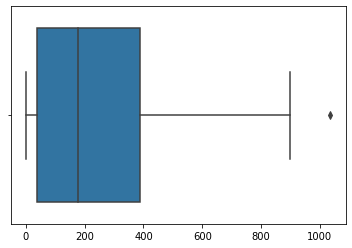

In [48]:
sns.boxplot(np.array(df['Phones (per 1000)']))

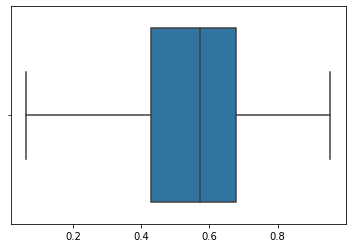

In [49]:
sns.boxplot(np.array(df['Service']))

The box plot of Service does not have any outliers

## Conclusion

From the EDA done above, we can say that Phones (per 1000) is the best predictor for GDP because it has a correlation of 0.83 with GDP also, it's linear regression graph is much better than the graphs of the other predictors.

Also, we can say that Missing values while doing EDA are not good. Therefore, we must learn to get rid of those. Few methods to get rid of these NaNs are highlighted above. The methods being dropping the rows containing NaN values, replacing the NaNs by zero or by replacing them by the mean or the median. Out of these methods, it is recommended to not drop the rows as it reduces the quality of the model. 

Filling the NaNs by zero, mean or the median values is recommended and the most commonly used method. Between mean and median, median is preferred because mean contains outliers


##  Citations

-  Article title:	Predicting GDP: world countries | Kaggle

   Website title:	Kaggle.com
  
   URL          :	https://www.kaggle.com/stieranka/predicting-gdp-world-countries
  

-  Article title:	What is Exploratory Data Analysis? – Towards Data Science

   Website title:	Towards Data Science

   URL          :	https://towardsdatascience.com/exploratory-data-analysis-8fc1cb20fd15


-  Article title:	Exploratory and Confirmatory Analysis: What’s the Difference? l Sisense

   Website title:	Sisense
   
   URL          :	https://www.sisense.com/blog/exploratory-confirmatory-analysis-whats-difference/
   
   
-  Article title:	Kaggle Tutorial: EDA & Machine Learning

   Website title:	DataCamp Community
   
   URL          :	https://www.datacamp.com/community/tutorials/kaggle-machine-learning-eda
   
   
-  Article title:	The tale of missing values in Python – Towards Data Science

   Website title:	Towards Data Science
   
   URL         :	https://towardsdatascience.com/the-tale-of-missing-values-in-python-c96beb0e8a9d